## Student Name(s)

Arnav

# Final Project Intro

This notebook contains three sections for you to complete your final project:
1. Data Inspection and Exploratory Data Analysis
2. Explanatory Model
3. Predictive Models

In each section, we provide detailed instructions for what we expect you to complete, as well as the corresponding point allocation. We have included a single code cell for you to begin working. Please add code cells and markdown cells as needed and as appropriate!

Keep in mind that your final should look like a report: code cells should be used for generating output and commentary should be in markdown cells. Steps that should be answered by using code are numbered and given in black. Questions that should be answered using a markdown cell are in purple and bulleted.

**We will deduct points if you answer the questions given in purple in a code cell.**











# Problem Description and Data Dictionary

You are an analyst working for a large international airline that has seen passenger satisfaction, and therefore profits, decline over the last several years. The management is determined to turn things around before the airline’s reputation and standing is permanently damaged. You have been asked to:
1. Identify which factors influence passenger satisfaction and how.
2. Develop a model to predict passenger satisfaction based on flight characteristics.

To complete this task, you have been given the results of past passenger satisfaction surveys. The data dictionary is as follows. Note that, other than *Satisfaction* (which is the binary outcome variable), all other variables measuring satisfaction have values ranging from 1 (least satisfied) to 5 (most satisfied), or 0 (not applicable).

| **Variable**                       | **Description**                                                                       |
| ---------------------------------- | ------------------------------------------------------------------------------------- |
| id                                 | Unique passenger/record identifier                                                    |
| Gender                             | Gender of the passenger (Female, Male)                                                |
| Customer Type                      | Customer loyalty type (Loyal customer, disloyal customer)                             |
| Age                                | Age of the passenger                                                                  |
| Type of Travel                     | Purpose of the flight for the passenger (Personal Travel, Business Travel)            |
| Class                              | Travel class in the plane of the passenger (Business, Eco, Eco Plus)                  |
| Inflight wifi service              | Satisfaction level of the inflight wifi service                                       |
| Department/Arrival time convenient | Satisfaction level of convenience of departure/arrival time                           |
| Ease of Online booking             | Satisfaction level of online booking                                                  |
| Gate location                      | Satisfaction level of gate location                                                   |
| Food and drink                     | Satisfaction level of food and drink                                                  |
| Online boarding                    | Satisfaction level of online boarding                                                 |
| Seat comfort                       | Satisfaction level of seat comfort                                                    |
| Inflight entertainment             | Satisfaction level of inflight entertainment                                          |
| On-board service                   | Satisfaction level of on-board service                                                |
| Leg room service                   | Satisfaction level of leg room                                                        |
| Baggage handling                   | Satisfaction level of baggage handling                                                |
| Check-in service                   | Satisfaction level of check-in service                                                |
| Inflight service                   | Satisfaction level of inflight service                                                |
| Cleanliness                        | Satisfaction level of cleanliness                                                     |
| Departure Delay in Minutes         | Minutes delayed when departing                                                        |
| Arrival Delay in Minutes           | Minutes delayed when arriving                                                         |
| Satisfaction                       | Overall customer satisfaction level (1 indicates satisfied, 0 indicates dissatisfied) |

# Section 0: Import packages and the dataset

Import packages as needed and read the dataset. (The dataset link is on the project page.)



In [ ]:
# Your code here
# Create as many additional cells as needed
import pandas as pd
!pip install dmba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from dmba import classificationSummary, plotDecisionTree
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/irenebao2020/badm211/main/airline.csv")

# Section 1: Dataset Inspection, Exploratory Data Analysis, and Preprocessing (40 points)

Complete the following steps and answer the following questions. For each step, please make sure to have one (or more) code cells and then create a markdown cell immediately following it in which to answer the question.

In this section, point allocations for each step will be based on both your code and response to the question.

**Data Inspection and Preprocessing** (20 points)

1. (*1 pt)* Print the first five rows.  

* <font color=purple> Name three categorical and three numerical variables.</font>

2. (*2 pts)* Print the descriptive statistics.

* <font color=purple> Describe 2-3 insights from this output.</font>

3. (*1 pt)* Print datatypes of the columns.

4. (*4 pts)* Use `groupby()` to show summary statistics for two numerical variables across different values of (at least) one categorical variable. (This simply asks for one `groupby` statement.)

* <font color=purple>What insights do you gain from this output?</font>

5. (*2 pts)* For two categorical variables of your choice, show the *proportion* of categories (AKA values) that each takes.

* <font color=purple>What can be said about the data based on these outputs?</font>

6. (*2 pts)* Check for missing values and handle them appropriately.

* <font color=purple>Are there any missing values in the data? If yes, which variable had the most missing values?</font>

7. (*2 pts)* Check for duplicate rows and handle them appropriately.

* <font color=purple>Are there any duplicate rows? If yes, how many?</font>

8. (*2 pts)* Show 5 rows of the data. By looking at the output you just generated, are there any variables that do *not* contain useful or relevant information about records? If so, be sure to remove them from the data. You may choose to remove multiple variables.

9. (*4 pts)* Identify what the outcome variable is. Depending on the variable type, provide summary statistics or the distribution of the outcome variable. If your outcome variable is a categorical variable, convert the text values to 0/1.

* <font color=purple>Is this a regression or classification problem? Why?</font>

**Data Visualization** (15 points)

*For this section, you can choose which variables you want to visualize. When completing this section, we encourage you to think about the relationships you are trying to explore and what you will ultimately be predicting.*

10. (*5 pts)* Draw a scatterplot.

* <font color=purple>Comment on your scatterplot.</font>

11. (*5 pts)* Draw a histogram.

* <font color=purple>Comment on your histogram. </font>

12. (*5 pts)* Draw a bar chart. Use mean as the summary statistic.

* <font color=purple>Comment on the bar chart.</font>

**Data Preprocessing** (5 points)

13. (*5 pts)* Dummy code your categorical variables. *Hint: You will need to dummy code differently for different modeling techniques. You can do both here and give the resulting dataframes different names.*

* <font color=purple>How many variables are in the resulting dataframe?</font>


In [ ]:
#1
df.head(5)

,id,Gender,Customer_Type,Age,Class,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,19556,Female,Loyal_Customer,52,Eco,3,4,3,5,5,5,2,5,5,1
1,90035,Female,Loyal_Customer,36,Business,5,4,5,4,4,4,3,4,5,1
2,12360,Male,disloyal_Customer,20,Eco,2,2,2,2,1,3,2,2,2,0
3,77959,Male,Loyal_Customer,44,Business,3,4,4,1,1,1,3,1,4,1
4,36875,Female,Loyal_Customer,49,Eco,4,1,2,2,2,2,4,2,4,1


Categorical Variables: Gender, Customer_Type, and Class

Numerical Variables: Age, Food_and_drink, and Seat_comfort

In [ ]:
#2
df.describe()

,id,Age,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
count,25855.000000,25855.000000,25855.000000,25855.00000,25855.000000,25855.000000,25855.000000,25855.000000,25855.000000,25855.000000,25855.000000,25855.000000
mean,65014.554516,39.619145,3.214813,3.26169,3.448385,3.356565,3.349604,3.632837,3.313982,3.648927,3.285245,0.438871
std,37603.362156,15.134873,1.331712,1.35544,1.320393,1.338706,1.318929,1.176100,1.268952,1.180773,1.319316,0.496259
min,17.000000,7.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,32199.500000,27.000000,2.000000,2.00000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,65331.000000,40.000000,3.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,97608.000000,51.000000,4.000000,4.00000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,1.000000
max,129877.000000,85.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


1. The average satisfaction level for food and drink is 3.21.

2. The average satisfaction level for online boarding is 3.26.

3. The average satisfaction level for checkin service is 3.31.

The customers have a medium level of satisfaction overall for the airline's food and drink, online boarding, and check-in service.

In [ ]:
#3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25855 entries, 0 to 25854
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      25855 non-null  int64 
 1   Gender                  25855 non-null  object
 2   Customer_Type           25855 non-null  object
 3   Age                     25855 non-null  int64 
 4   Class                   25855 non-null  object
 5   Food_and_drink          25855 non-null  int64 
 6   Online_boarding         25855 non-null  int64 
 7   Seat_comfort            25855 non-null  int64 
 8   Inflight_entertainment  25855 non-null  int64 
 9   Leg_room_service        25855 non-null  int64 
 10  Baggage_handling        25855 non-null  int64 
 11  Checkin_service         25855 non-null  int64 
 12  Inflight_service        25855 non-null  int64 
 13  Cleanliness             25855 non-null  int64 
 14  satisfaction            25855 non-null  int64 
dtypes:

In [ ]:
#4
grouped = df.groupby('Class')[['Age', 'Food_and_drink']].mean()
print(grouped)

                Age  Food_and_drink
Class                              
Business  41.799727        3.357855
Eco       37.356597        3.085868
Eco_Plus  39.049189        3.060178


The output provides insight about the mean age of passengers for each class. Also, it provides insight for the mean food and drink satisfaction level for each class.

In [ ]:
#5
df["Customer_Type"].value_counts(normalize=True)

,proportion
Customer_Type,
Loyal_Customer,0.815278
disloyal_Customer,0.184722


In [ ]:
#5
df["Class"].value_counts(normalize=True)

,proportion
Class,
Business,0.481067
Eco,0.445020
Eco_Plus,0.073912


This data shows the distribution of customer types (loyal and disloyal) in the dataset. Also, it shows the distribution of classes (business, eco, eco plus) in the dataset.

In [ ]:
#6
df.isnull().sum()

,0
id,0
Gender,0
Customer_Type,0
Age,0
Class,0
Food_and_drink,0
Online_boarding,0
Seat_comfort,0
Inflight_entertainment,0
Leg_room_service,0


There are no missing values in the data.

In [ ]:
#7
df.duplicated().sum()

0

There are no duplicate rows in the data.

In [ ]:
#8
df.head(5)

,id,Gender,Customer_Type,Age,Class,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,19556,Female,Loyal_Customer,52,Eco,3,4,3,5,5,5,2,5,5,1
1,90035,Female,Loyal_Customer,36,Business,5,4,5,4,4,4,3,4,5,1
2,12360,Male,disloyal_Customer,20,Eco,2,2,2,2,1,3,2,2,2,0
3,77959,Male,Loyal_Customer,44,Business,3,4,4,1,1,1,3,1,4,1
4,36875,Female,Loyal_Customer,49,Eco,4,1,2,2,2,2,4,2,4,1


In [ ]:
#8
df.drop(columns='id', inplace=True)

In [ ]:
#8
df.head(5)

,Gender,Customer_Type,Age,Class,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,satisfaction
0,Female,Loyal_Customer,52,Eco,3,4,3,5,5,5,2,5,5,1
1,Female,Loyal_Customer,36,Business,5,4,5,4,4,4,3,4,5,1
2,Male,disloyal_Customer,20,Eco,2,2,2,2,1,3,2,2,2,0
3,Male,Loyal_Customer,44,Business,3,4,4,1,1,1,3,1,4,1
4,Female,Loyal_Customer,49,Eco,4,1,2,2,2,2,4,2,4,1


In [ ]:
#9
df.satisfaction.describe()

,satisfaction
count,25855.000000
mean,0.438871
std,0.496259
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


This is a classification problem because the outcome variable ("satisfaction") is a categorical variable. More specifically, this is a binary classification problem since the outcome variable ("satisfaction") has values of either 0 or 1.

In [ ]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Class', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Inflight_service', 'Cleanliness', 'satisfaction'],
      dtype='object')

<Axes: xlabel='Inflight_entertainment', ylabel='Age'>

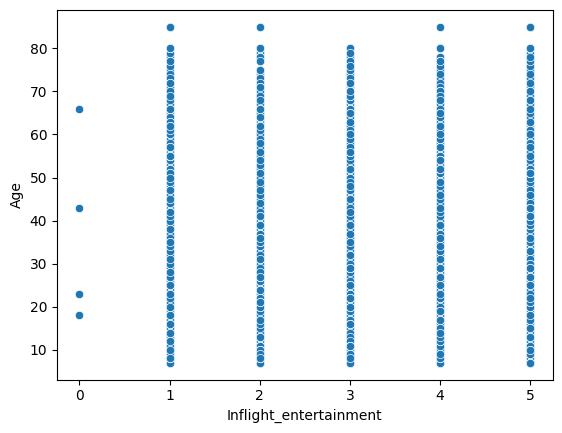

In [ ]:
#10
sns.scatterplot(x=df['Inflight_entertainment'], y=df['Age'])

The scatterplot shows the distribution of data across different levels of satisfaction with inflight entertainment and age. There seems to be an equal number of people of different ages for each of the inflight entertainment satisfaction levels except for 0, no satisfaction. For medium satisfaction (3), there seems to be no old people (older than 80 years) who rated inflight entertainment with a satisfaction level of 3.

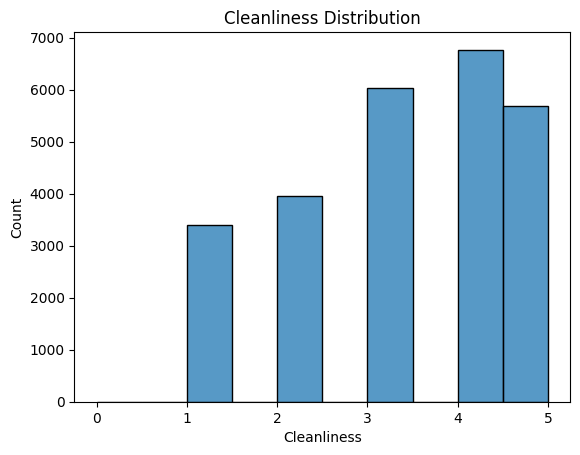

In [ ]:
#11
sns.histplot(x= df['Cleanliness'], bins=10)
plt.title('Cleanliness Distribution')
plt.show()

The histogram shows a range of cleanliness satisfaction ratings. Most people are fairly satisfied with the cleanliness of the airline, with larger bins for satisfaction levels of 4 and 5.

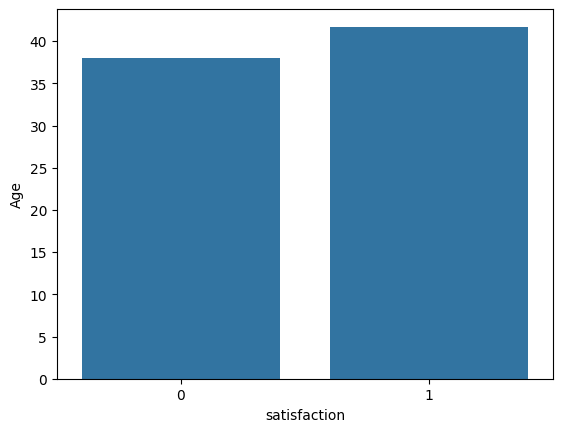

In [ ]:
#12
sns.barplot(x=df['satisfaction'], y=df['Age'], errorbar = None, estimator = 'mean')
plt.show()

The bar chart compares the mean age of passengers who are satisified versus those who are not satisfied. Satisfaction is a binary variable here, and the average age of customers who are not satisfied with the airline is less than the average age of customers who are satisfied with the airline.

In [ ]:
#13
logistic_df = pd.get_dummies(df, columns=['Gender', 'Customer_Type', 'Class'], drop_first=True)
num_variables_logistic = logistic_df.shape[1]
print(num_variables_logistic)

15


There are 15 variables in the resulting dataframe.

# Section 2: Explanatory Modeling   (20 points)

1. *(10 pts)* Fit an explanatory model using the whole dataset (after dropping irrelevant predictors), and print its output.
* *(5 pts)* <font color=purple> Are any of the variables insignificant? Which ones?</font>
* *(5 pts)* <font color=purple> Interpret the coefficients of the independent variables that *are* significant. Do this for at least three variables, doing this for at least one dummy variable and one numerical variable.</font>


In [ ]:
#1
import statsmodels.formula.api as smf
mlr_model = smf.ols('satisfaction ~ Gender + Customer_Type + Class + Food_and_drink + Online_boarding + Seat_comfort + Inflight_entertainment + Leg_room_service + Baggage_handling + Checkin_service + Inflight_service + Cleanliness', data=df).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     1646.
Date:                Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:46:23   Log-Likelihood:                -10772.
No. Observations:               25855   AIC:                         2.157e+04
Df Residuals:                   25841   BIC:                         2.169e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Only one of the variables, Seat_comfort, is insignificant, because it has a p-value of 0.470. This means that there's a 47% chance the Seat_comfort variable has no effect on the dependent variable we're examining.

3 significant independent varaibles are Class[T.Eco], Inflight_entertainment, and Cleanliness. Class[T.Eco] is a dummy variable that was created from the categorical variable class for the different classes customers fly in, and it has a coefficient of -0.3120, which means that it has a negative or inverse relationship with overall satisfaction. In other words, flying in T.Eco class leads to lower overall satisfaction.
Inflight_entertainment is a numerical variable going from 1-5 with different levels of satisfaction with inflight entertainment provided, and it has a coefficient of 0.0655, which means that higher inflight entertainment satisfaction levels are related to higher overall satisfaction. Cleanliness is another numerical variable that goes from 1-5 for different levels of satisfaction with cleanliness, and it has a coefficient of 0.0146, which means that higher satisfaction levels with cleanliness are related to higher overall satisfaction.

# Section 3: Predictive Modeling (30 (Regression) or 35 (Classification) points)
**Data Preprocessing** (10 points)
1. *(3 pts)* Split the data into `X` and `y`.

2. *(4 pts)* Create training and test sets, with 80\% of the data in the training set and 20\% in the test set, and save them as *train_X*, *test_X*, *train_y*, and *test_y*.
* *(3 pts)* <font color=purple> Why do we partition data when doing predictive modeling?</font>

**Fitting and Predicting the Models** (30 points for Regression, 35 points for Classification)

Next, you will create three predictive models:
  * `Model1`: either logistic regression (for classification) or MLR (for regression)
  * `Model2`: decision tree (with or without grid search)
  * `Model3`: random forest (with or without grid search)

Repeat steps 3 through 6 for each model.

3. *(1 pts x 3)* Fit the predictive model.

4. *(2 pts x 2)* Print the model coefficients (for `Model1`) or visualize the tree (for `Model2`). No output for `Model3`.

5. *(2 pts x 3)* Make predictions on the training and test sets.

6. *(2 pts x 3)* For regression problems, print the predictive accuracy measures (e.g., ME, MAE, etc.). For classification problems, display the confusion matrix.

8. *(5 pts)* For classification problems, plot the ROC curves (in a single plot) for all three models.

* *(1 pts)* <font color=purple> Which model performs the best? What are you basing this off of?</font>


In [ ]:
#1
y= df['satisfaction']
x= df.drop('satisfaction', axis=1)
x= pd.get_dummies(x, drop_first=True)

In [ ]:
#2
train_X, test_X, train_y,test_y= train_test_split(x, y, test_size=0.2, random_state=10)

We partition data when doing predictive modeling because it allows us to properly evaluate the model's performance. Also, it helps prevent overfitting.

In [ ]:
#3:
model1= LogisticRegression(class_weight='balanced', random_state=10)
model1.fit(train_X, train_y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=10)

In [ ]:
#3
model2= DecisionTreeClassifier(class_weight='balanced', random_state=10)
model2.fit(train_X, train_y)


DecisionTreeClassifier(class_weight='balanced', random_state=10)

In [ ]:
#3
model3= RandomForestClassifier(class_weight='balanced', random_state=10)
model3.fit(train_X, train_y)

RandomForestClassifier(class_weight='balanced', random_state=10)

In [ ]:
#4
for i, coef in enumerate(model1.coef_[0]):
    print(f"Coefficient for {train_X.columns[i]}: {coef}")

Coefficient for Age: -0.007637222068896984
Coefficient for Food_and_drink: 0.017432432012228428
Coefficient for Online_boarding: 0.68913387839681
Coefficient for Seat_comfort: -0.04506193992664554
Coefficient for Inflight_entertainment: 0.4671275198070166
Coefficient for Leg_room_service: 0.28184399918871367
Coefficient for Baggage_handling: 0.06766971232682556
Coefficient for Checkin_service: 0.21876529662117988
Coefficient for Inflight_service: -0.02020837882097315
Coefficient for Cleanliness: 0.04231527506653403
Coefficient for Gender_Male: 0.11246165534490499
Coefficient for Customer_Type_disloyal_Customer: -0.6570434449559447
Coefficient for Class_Eco: -1.8197055778379045
Coefficient for Class_Eco_Plus: -2.2981871660245203


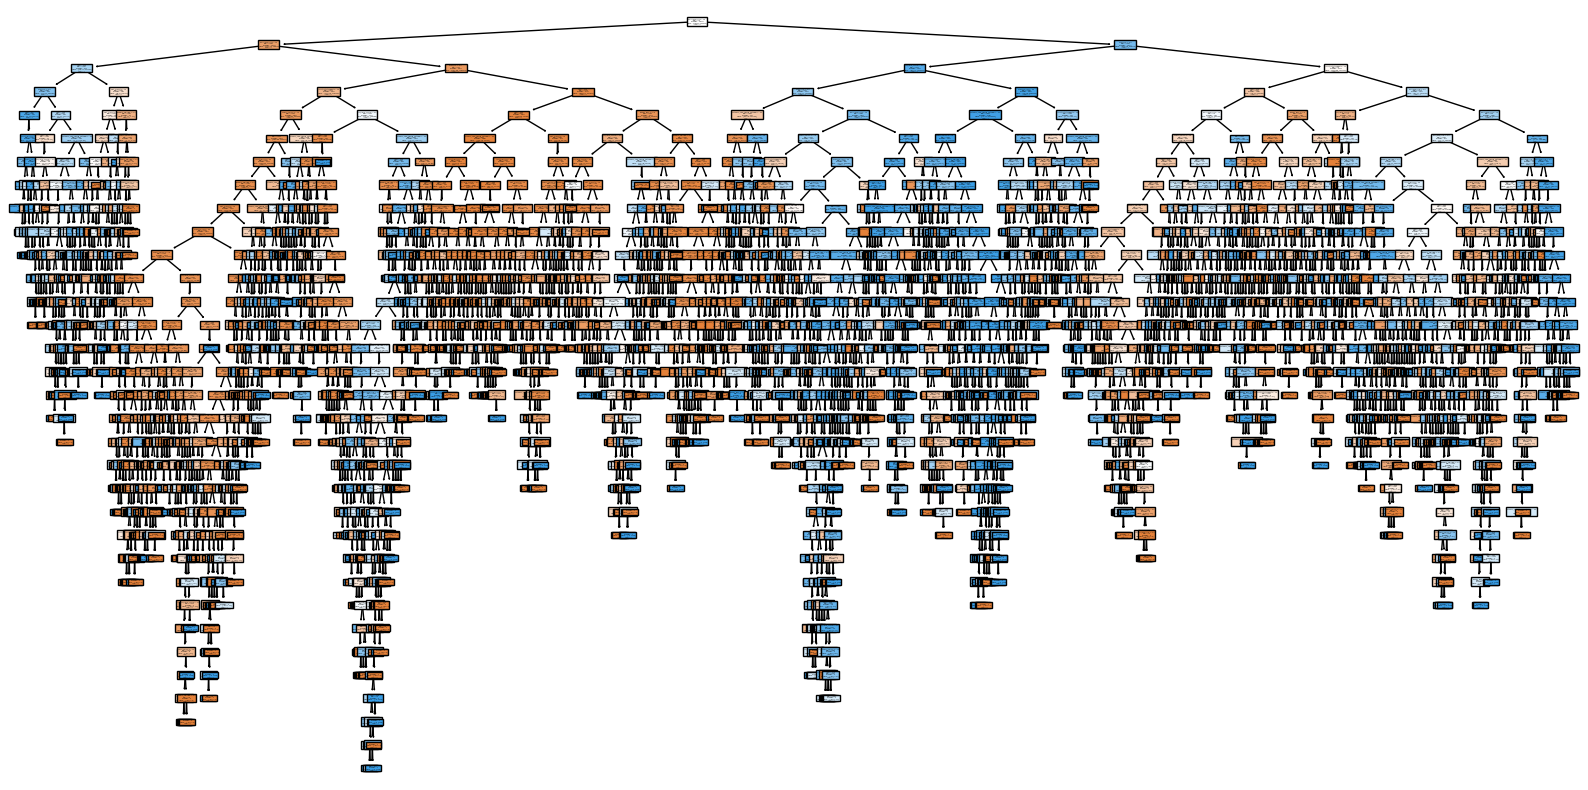

In [ ]:
#4
plt.figure(figsize=(20,10))
plot_tree(model2, feature_names=train_X.columns, class_names=['0', '1'], filled=True)
plt.show()

In [ ]:
#5
train_predict_model1= model1.predict(train_X)
test_predict_model1= model1.predict(test_X)

In [ ]:
#5
train_predict_model2= model2.predict(train_X)
test_predict_model2= model2.predict(test_X)

In [ ]:
#5
train_predict_model3 = model3.predict(train_X)
test_predict_model3 = model3.predict(test_X)

In [ ]:
#6
train_cm_model1 = confusion_matrix(train_y, train_predict_model1)
print(train_cm_model1)

test_cm_model1 = confusion_matrix(test_y, test_predict_model1)
print(test_cm_model1)

[[9592 2006]
 [1788 7298]]
[[2377  533]
 [ 437 1824]]


In [ ]:
#6
train_cm_model2 = confusion_matrix(train_y, train_predict_model2)
print(train_cm_model2)

test_cm_model2 = confusion_matrix(test_y, test_predict_model2)
print(test_cm_model2)

[[11580    18]
 [    0  9086]]
[[2588  322]
 [ 323 1938]]


In [ ]:
#6
train_cm_model3 = confusion_matrix(train_y, train_predict_model3)
print(train_cm_model3)

test_cm_model3 = confusion_matrix(test_y, test_predict_model3)
print(test_cm_model3)

[[11587    11]
 [    7  9079]]
[[2742  168]
 [ 267 1994]]


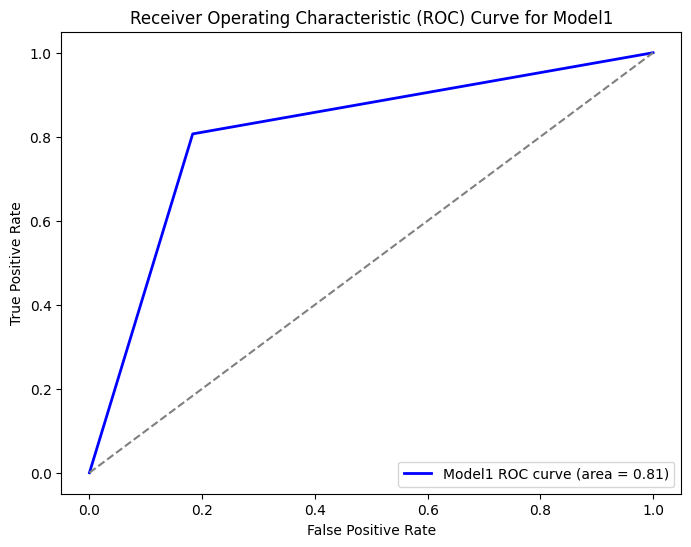

In [ ]:
#7
fpr_model1, tpr_model1, _ = roc_curve(test_y, test_predict_model1)
roc_auc_model1 = auc(fpr_model1, tpr_model1)

plt.figure(figsize=(8, 6))
plt.plot(fpr_model1, tpr_model1, color='blue', lw=2, label=f'Model1 ROC curve (area = {roc_auc_model1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Model1')
plt.legend(loc='lower right')
plt.show()

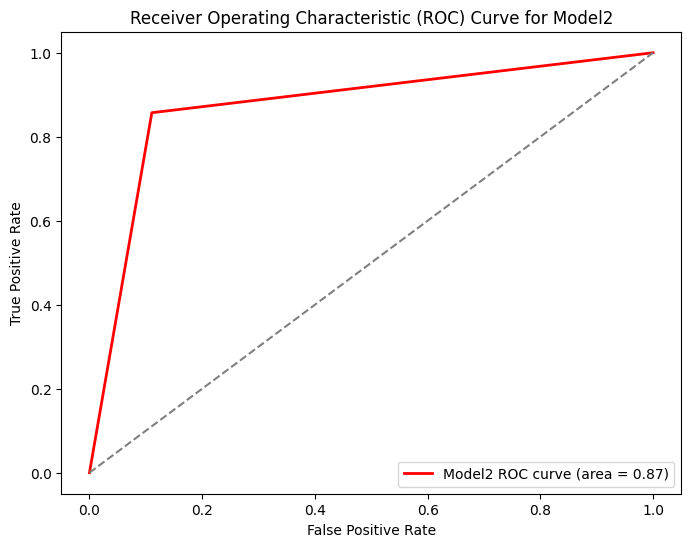

In [ ]:
#7
fpr_model2, tpr_model2, _ = roc_curve(test_y, test_predict_model2)
roc_auc_model2 = auc(fpr_model2, tpr_model2)

plt.figure(figsize=(8, 6))
plt.plot(fpr_model2, tpr_model2, color='red', lw=2, label=f'Model2 ROC curve (area = {roc_auc_model2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Model2')
plt.legend(loc='lower right')
plt.show()

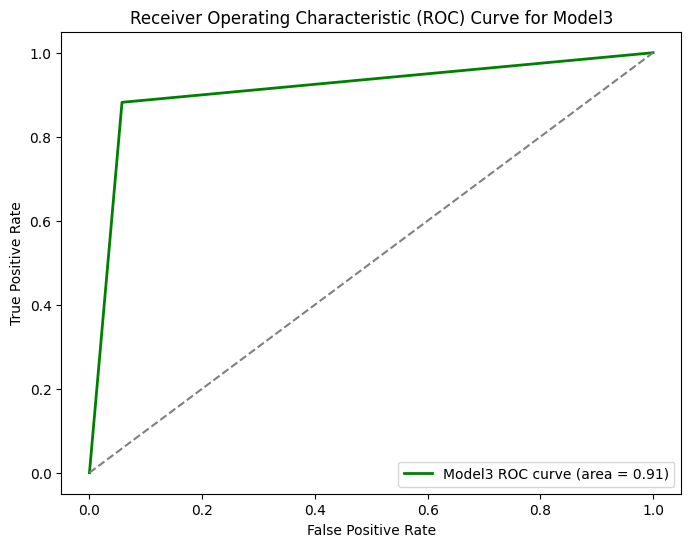

In [ ]:
#7
fpr_model3, tpr_model3, _ = roc_curve(test_y, test_predict_model3)
roc_auc_model3 = auc(fpr_model3, tpr_model3)

plt.figure(figsize=(8, 6))
plt.plot(fpr_model3, tpr_model3, color='green', lw=2, label=f'Model3 ROC curve (area = {roc_auc_model3:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Model3')
plt.legend(loc='lower right')
plt.show()

Model 3 performs the best because it has the highest AUC value (0.91) out of all the models. The AUC is the area under the ROC curve, and it is used for comparing the performance of models because it assesses how well these models would perform compared to a naive model (AUC = 0.5), and a higher AUC indicates that a model is good and accurate at predicting classes.

# Section 4: Computing the value of your work (Classification) (15 Points)

In this section, you will compare the performance of two models:
* a naive model (in which the predicted class is simply the *majority class* in the data used to fit the model; and
* one of your models from above.

1. *(4 pts)* For each model (naive and chosen), define the number of true positives, false positives, true negatives, and false negatives for the test set.

**Problem Setup**

It is important for the airline to correctly predict passenger satisfaction, so they have the opportunity to preemptively improve the experience for dissatisfied passengers. In particular, passengers that are unsatisfied with a flight are less likely to fly with the airline in the future, resulting in  revenue loss of \$5,000 for the airline. This can be avoided by offering them a \$500 voucher for a free flight and hotel accommodation immediately after their flight (before waiting for feedback via a survey).

Thus, for your dataset, the average costs of misclassification and value of an accurate prediction are as follows:
- Each false positive will cost you \$5,000.
- Each false negative will cost you \$500.
- Each true negative saves you \$4,500.
- Each  true positive has no cost or savings.


**Value Calculation**
2. *(6 pts)* Using the values you defined above, as well as the information provided regarding the costs and benefits of your predictions, calculate the average return from using the naive model and from your chosen model. Make sure to display the output for each.

* *(5 pts)* <font color=purple> What is the average benefit from using your model instead of a naive model? (If you don't see there is a benefit, you may want to choose a different model or double-check your analysis!)</font>

In [ ]:
#1 - Model 1
classificationSummary(test_y, test_predict_model1)

Confusion Matrix (Accuracy 0.8124)

       Prediction
Actual    0    1
     0 2377  533
     1  437 1824


In [ ]:
tp_model1 = 1824
fp_model1= 437
fn_model1 = 533
tn_model1= 2377

In [ ]:
#1 - Naive Model
df_naive = pd.DataFrame({'actual_satisfaction': test_y, 'predicted_satisfaction_naive': 1})
df_naive.head()

,actual_satisfaction,predicted_satisfaction_naive
8073,0,1
19763,0,1
684,0,1
9235,0,1
19556,0,1


In [ ]:
classificationSummary(df_naive["actual_satisfaction"], df_naive["predicted_satisfaction_naive"])

Confusion Matrix (Accuracy 0.4372)

       Prediction
Actual    0    1
     0    0 2910
     1    0 2261


In [ ]:
tp_df_naive = 2261
fp_df_naive= 2910
fn_df_naive = 0
tn_df_naive= 0

In [ ]:
#2
cost_per_fp = -5000
cost_per_fn = -500
savings_per_tn = 4500

total_pred = tp_model1 + fp_model1 + fn_model1 + tn_model1

#Naive model financial impact
cost_naive = (fp_df_naive * cost_per_fp) + (fn_df_naive * cost_per_fn)
savings_naive = tn_df_naive * savings_per_tn
net_naive_benefit = savings_naive + cost_naive
print("Net Naive Model Financial Impact:", net_naive_benefit)

#Model 1 financial impact
cost_model1 = (fp_model1 * cost_per_fp) + (fn_model1 * cost_per_fn)
savings_model1 = tn_model1 * savings_per_tn
net_model1_benefit = savings_model1 + cost_model1
print("Net Model 1 Financial Impact:", net_model1_benefit)

# Average net benefit calculation
average_benefit_model1 = net_model1_benefit / total_pred
average_benefit_naive = net_naive_benefit / total_pred

benefit_difference = average_benefit_model1 - average_benefit_naive
print("Benefit Difference Between Models:", benefit_difference)

Net Naive Model Financial Impact: -14550000
Net Model 1 Financial Impact: 8245000
Benefit Difference Between Models: 4408.238251788822


The average benefit from using our model is $4,408.23!

In [ ]:
print(average_benefit_model1)
print(average_benefit_naive)

1594.46915490234
-2813.769096886482


The average benefit from using our model is $4,408.23!